In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [ ]:
df_Biden = pd.read_csv(r"C:\Users\Beth\Documents\hashtag_joebiden.csv", error_bad_lines=False, encoding = "ISO-8859-1")

C:\Users\Beth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,3,6,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df_Biden.info()
df_Biden.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777078 entries, 0 to 777077
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   source                776182 non-null  object 
 6   user_id               776889 non-null  object 
 7   user_name             776877 non-null  object 
 8   user_screen_name      776895 non-null  object 
 9   user_description      694885 non-null  object 
 10  user_join_date        776784 non-null  object 
 11  user_followers_count  776885 non-null  object 
 12  user_location         543066 non-null  object 
 13  lat                   355284 non-null  object 
 14  long                  355284 non-null  object 
 15  

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,10/15/2020 0:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.7743,-80.1937,NaN,United States of America,North America,Florida,FL,10/21/2020 0:00
1,10/15/2020 0:00,1.32E+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Twitter for iPad,809904438,Cheri A. ðºð¸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5
2,10/15/2020 0:00,1.32E+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Twitter Web App,3494182277,Flag Waver,Flag_Wavers,NaN,...,1536,Golden Valley Arizona,46.304,-109.171,NaN,United States of America,North America,Montana,MT,00:01.0
3,10/15/2020 0:00,1.32E+18,@chrislongview Watching and setting dvr. Letâ...,0,0.0,Twitter for iPhone,8.24E+17,Michelle Ferg,MichelleFerg4,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6
4,10/15/2020 0:00,1.32E+18,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,Twitter Web App,1.03E+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390,"California, USA",36.7015,-118.756,NaN,United States of America,North America,California,CA,00:02.1


In [ ]:
# Get the data just for tweets from the US
US_Biden = df_Biden[df_Biden['country'] == 'United States of America']

# Convert 'likes' and 'user_followers_counts' from objects to floats
US_Biden['likes'] = US_Biden['likes'].astype(float)
US_Biden['user_followers_count'] = US_Biden['user_followers_count'].astype(float)

US_Biden = US_Biden[US_Biden['user_followers_count'] >= 20000]

<ipython-input-8-51e3b1be13b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Biden['likes'] = US_Biden['likes'].astype(float)
<ipython-input-8-51e3b1be13b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Biden['user_followers_count'] = US_Biden['user_followers_count'].astype(float)


In [ ]:
US_Biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7826 entries, 92 to 777019
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            7826 non-null   object 
 1   tweet_id              7826 non-null   object 
 2   tweet                 7826 non-null   object 
 3   likes                 7826 non-null   float64
 4   retweet_count         7826 non-null   float64
 5   source                7826 non-null   object 
 6   user_id               7826 non-null   object 
 7   user_name             7826 non-null   object 
 8   user_screen_name      7826 non-null   object 
 9   user_description      7797 non-null   object 
 10  user_join_date        7826 non-null   object 
 11  user_followers_count  7826 non-null   float64
 12  user_location         7826 non-null   object 
 13  lat                   7826 non-null   object 
 14  long                  7826 non-null   object 
 15  city              

In [ ]:
# Create a dataframe for states that Biden won
states_Biden_won = US_Biden[US_Biden['state_code'].isin(['WA', 'OR', 'CA', 'NV', 'AZ', 'CO', 'NM', 'MN', 'WI', 'IL',
                                                    'MI', 'PA', 'ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'DE',
                                                    'MD', 'DC', 'VA', 'HI', 'NY' 'GA'])]
# Create a dataframe for states that Biden lost
states_Biden_lost = US_Biden[US_Biden['state_code'].isin(['ID', 'MT', 'UT', 'WY', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX',
                                                    'IA', 'MO', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'IN', 'OH',
                                                    'WV', 'NC', 'SC', 'FL', 'AK', 'AL'])]

### 1. On average, do tweets with  #Biden from big accounts, defined as those with more than 20,000 followers, receive more likes in states that Biden won compared to states that he lost?

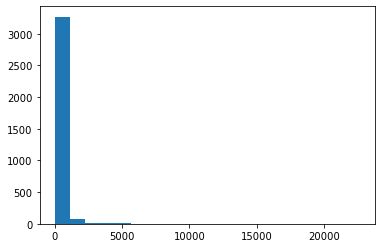

In [ ]:
# Check whether the data is normally distributed
plt.hist(states_Biden_won['likes'], bins=20)
plt.xlabel('');

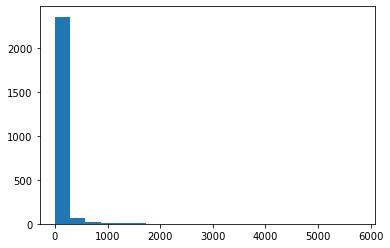

In [ ]:
plt.hist(states_Biden_lost['likes'], bins=20);

In [ ]:
print(stats.describe(states_Biden_won['likes']))
print(stats.describe(states_Biden_lost['likes']))

DescribeResult(nobs=3394, minmax=(0.0, 22641.0), mean=189.9166175604007, variance=945711.805895305, skewness=15.594912307010508, kurtosis=304.6146358585004)
DescribeResult(nobs=2459, minmax=(0.0, 5782.0), mean=56.11224074827165, variance=55265.203019346416, skewness=13.379162233165003, kurtosis=252.78461790166463)


In [ ]:
print(stats.shapiro(states_Biden_won['likes']))
print(stats.shapiro(states_Biden_lost['likes']))

ShapiroResult(statistic=0.16186904907226562, pvalue=0.0)
ShapiroResult(statistic=0.2144593596458435, pvalue=0.0)


The data is not normally distributed, so the medians will be compared.

In [ ]:
states_Biden_won['likes'].median() - states_Biden_lost['likes'].median()

6.0

In [ ]:
states_Biden_won.describe()

,likes,retweet_count,user_followers_count
count,3394.000000,3394.000000,3.394000e+03
mean,189.916618,47.327637,2.089269e+05
std,972.477149,196.086708,4.671509e+05
min,0.000000,0.000000,2.000000e+04
25%,2.000000,0.000000,2.652925e+04
50%,11.000000,3.000000,5.298750e+04
75%,65.000000,13.000000,1.950160e+05
max,22641.000000,4376.000000,5.750841e+06


In [ ]:
states_Biden_lost.describe()

,likes,retweet_count,user_followers_count
count,2459.000000,2459.000000,2.459000e+03
mean,56.112241,19.428223,1.523711e+05
std,235.085523,75.376025,4.624888e+05
min,0.000000,0.000000,2.005200e+04
25%,1.000000,0.000000,3.124400e+04
50%,5.000000,2.000000,4.748500e+04
75%,24.000000,7.000000,9.872000e+04
max,5782.000000,1506.000000,2.966787e+06


Becuase the data was not normally distributed, the Kruskal-Wallis test will be used to check the signficance of the difference in medians.

In [ ]:
stats.kruskal(states_Biden_won['likes'], states_Biden_lost['likes'])

KruskalResult(statistic=189.0840698768215, pvalue=5.038036162210118e-43)

Based on the p-value, there appears to be a significant difference, which means we can reject the null hypothesis.

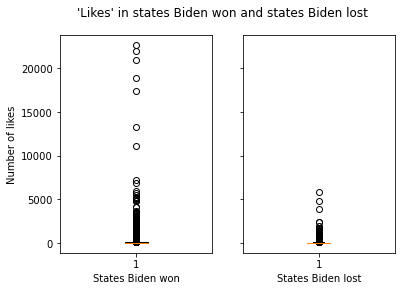

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("'Likes' in states Biden won and states Biden lost")
ax1.boxplot(states_Biden_won['likes'])
ax2.boxplot(states_Biden_lost['likes'])

ax1.set_xlabel('States Biden won')
ax2.set_xlabel('States Biden lost')
ax1.set_ylabel('Number of likes');

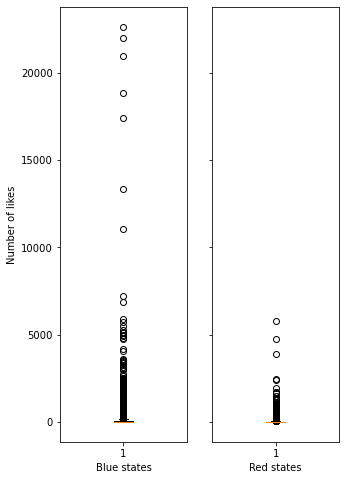

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,8), sharey=True)
ax1.boxplot(states_Biden_won['likes'])
ax2.boxplot(states_Biden_lost['likes'])

ax1.set_xlabel('Blue states')
ax2.set_xlabel('Red states')
ax1.set_ylabel('Number of likes')

plt.show();

Looking at the two boxplots, it appears as though tweets with #Biden received more likes in states that Biden won.

### 2. On average, do tweets with #Biden from big accounts receive more retweets in states that Biden won compared to states that he lost?

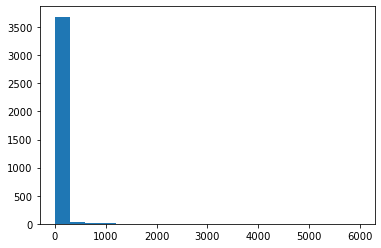

In [ ]:
# Check that the data for 'retwee_count' is normally distributed
plt.hist(states_Biden_won['retweet_count'], bins=20);

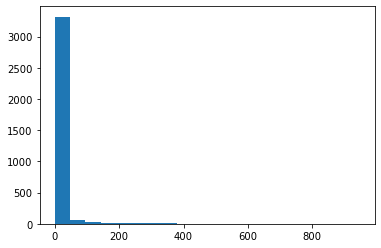

In [ ]:
plt.hist(states_Biden_lost['retweet_count'], bins=20);

In [ ]:
print(stats.describe(states_Biden_won['retweet_count']))
print(stats.describe(states_Biden_lost['retweet_count']))

DescribeResult(nobs=3755, minmax=(0.0, 5986.0), mean=29.50652463382157, variance=44832.15465906939, skewness=18.682448937577256, kurtosis=423.098853396418)
DescribeResult(nobs=3485, minmax=(0.0, 946.0), mean=11.381922525107605, variance=2774.1775720778073, skewness=9.015792519566833, kurtosis=104.80972969845403)


In [ ]:
print(stats.shapiro(states_Biden_won['retweet_count']))
print(stats.shapiro(states_Biden_lost['retweet_count']))

ShapiroResult(statistic=0.23317205905914307, pvalue=0.0)
ShapiroResult(statistic=0.2526327967643738, pvalue=0.0)


The data is not normally distributed, so the medians will be compared.

In [ ]:
states_Biden_won['retweet_count'].median() - states_Biden_lost['retweet_count'].median()

1.0

Becuase the data was not normally distributed, the Kruskal-Wallis test will be used to check the signficance of the difference in medians.

In [ ]:
stats.kruskal(states_Biden_won['retweet_count'], states_Biden_lost['retweet_count'])

KruskalResult(statistic=185.45579392945845, pvalue=3.1210079787399454e-42)

Based on the p-value, there appears to be a significant difference, which means we can reject the null hypothesis.

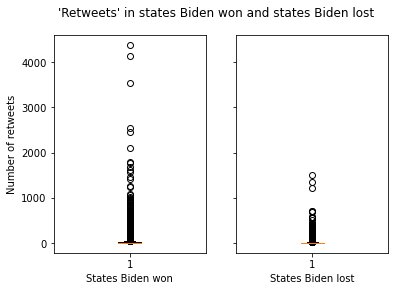

In [ ]:
fig, (ax1, ax2) =plt.subplots(1, 2, sharey=True)
fig.suptitle("'Retweets' in states Biden won and states Biden lost")
ax1.boxplot(states_Biden_won['retweet_count'])
ax2.boxplot(states_Biden_lost['retweet_count'])

ax1.set_xlabel('States Biden won')
ax2.set_xlabel('States Biden lost')
ax1.set_ylabel('Number of retweets');

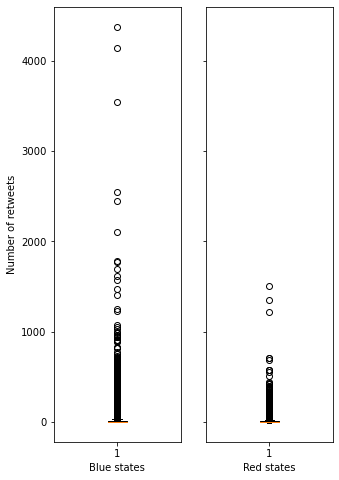

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,8), sharey=True)
ax1.boxplot(states_Biden_won['retweet_count'])
ax2.boxplot(states_Biden_lost['retweet_count'])

ax1.set_xlabel('Blue states')
ax2.set_xlabel('Red states')
ax1.set_ylabel('Number of retweets')

plt.show();

Looking at the two boxplots, it appears as though tweets with #Biden received more retweets in states that Biden won.

In [ ]:
df_Trump = pd.read_csv(r"C:\Users\Beth\Documents\hashtag_donaldtrump.csv", error_bad_lines=False, encoding = "ISO-8859-1")

C:\Users\Beth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,3,6,11,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df_Trump.info()
df_Trump.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971157 entries, 0 to 971156
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971088 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970917 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869663 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970917 non-null  object 
 12  user_location         675839 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  445705 non-null  object 
 15  

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,10/15/2020 0:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.7743,-80.1937,NaN,United States of America,North America,Florida,FL,10/21/2020 0:00
1,10/15/2020 0:00,1.32E+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4
2,10/15/2020 0:00,1.32E+18,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.5202,-122.674,Portland,United States of America,North America,Oregon,OR,00:00.7
3,10/15/2020 0:00,1.32E+18,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1
4,10/15/2020 0:00,1.32E+18,You get a tie! And you get a tie! #Trump âs ...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.895,-77.0366,Washington,United States of America,North America,District of Columbia,DC,00:01.5


In [ ]:
# Get the data just for tweets from the US
US_Trump = df_Trump[df_Trump['country'] == 'United States of America']

# Convert 'likes' and 'user_followers_counts' from objects to floats
US_Trump['likes'] = US_Trump.likes.astype(float) 
US_Trump['user_followers_count'] = US_Trump.user_followers_count.astype(float)

# Limit the data to tweets from big accounts, or users with more than 20000 followers
US_Trump = US_Trump[US_Trump['user_followers_count'] >= 20000]

US_Trump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8883 entries, 117 to 970824
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            8883 non-null   object 
 1   tweet_id              8883 non-null   object 
 2   tweet                 8883 non-null   object 
 3   likes                 8883 non-null   float64
 4   retweet_count         8883 non-null   float64
 5   source                8883 non-null   object 
 6   user_id               8883 non-null   object 
 7   user_name             8883 non-null   object 
 8   user_screen_name      8883 non-null   object 
 9   user_description      8854 non-null   object 
 10  user_join_date        8883 non-null   object 
 11  user_followers_count  8883 non-null   float64
 12  user_location         8883 non-null   object 
 13  lat                   8883 non-null   object 
 14  long                  8883 non-null   object 
 15  city             

<ipython-input-14-40ddd705cc8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Trump['likes'] = US_Trump.likes.astype(float)
<ipython-input-14-40ddd705cc8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Trump['user_followers_count'] = US_Trump.user_followers_count.astype(float)


In [ ]:
# Create a dataframe for states that Trump won
states_Trump_won = US_Trump[US_Trump['state_code'].isin(['ID', 'MT', 'UT', 'WY', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX',
                                                    'IA', 'MO', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'IN', 'OH',
                                                    'WV', 'NC', 'SC', 'FL', 'AK', 'AL'])]

# Create a dataframe for states that Trump lost
states_Trump_lost = US_Trump[US_Trump['state_code'].isin(['WA', 'OR', 'CA', 'NV', 'AZ', 'CO', 'NM', 'MN', 'WI', 'IL',
                                                    'MI', 'PA', 'ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'DE',
                                                    'MD', 'DC', 'VA', 'HI', 'NY' 'GA'])]

### 3. On average, do tweets with  #Trump from big accounts receive more likes in states that Trump won compared to states that he lost?

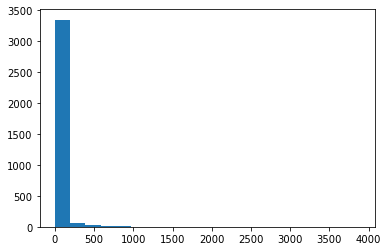

In [ ]:
# Check whether the data for 'retweet_count' is normally distributed
plt.hist(states_Trump_won['likes'], bins=20);

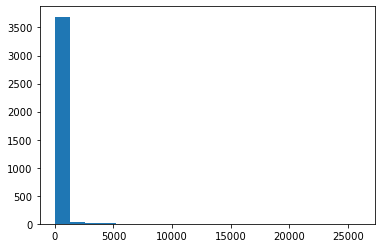

In [ ]:
plt.hist(states_Trump_lost['likes'], bins=20);

In [ ]:
print(stats.describe(states_Trump_won['likes']))
print(stats.describe(states_Trump_lost['likes']))

DescribeResult(nobs=3485, minmax=(0.0, 3880.0), mean=29.428981348637016, variance=15813.886243652063, skewness=13.095557166660063, kurtosis=295.3502546935333)
DescribeResult(nobs=3755, minmax=(0.0, 25987.0), mean=126.21411451398136, variance=806931.0202056286, skewness=17.338155835283533, kurtosis=367.12179478322696)


In [ ]:
print(stats.shapiro(states_Trump_won['likes']))
print(stats.shapiro(states_Trump_lost['likes']))

ShapiroResult(statistic=0.22227519750595093, pvalue=0.0)
ShapiroResult(statistic=0.10620242357254028, pvalue=0.0)


The data was not normally distributed, so their medians will be compared.

In [ ]:
states_Trump_won['likes'].median() - states_Trump_lost['likes'].median()

-3.0

Becuase the data was not normally distributed, the Kruskal-Wallis test will be used to check the signficance of the difference in medians.

In [ ]:
stats.kruskal(states_Trump_won['likes'], states_Trump_lost['likes'])

KruskalResult(statistic=271.05116953354565, pvalue=6.695963132187084e-61)

Based on the p-value, there appears to be a significant difference, which means we can reject the null hypothesis.

Text(0, 0.5, 'Number of likes')

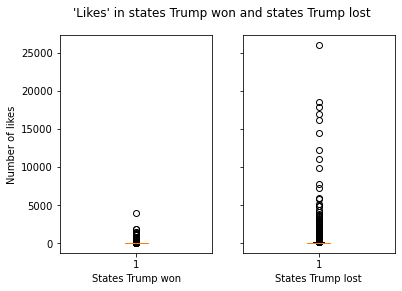

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("'Likes' in states Trump won and states Trump lost")
ax1.boxplot(states_Trump_won['likes'])
ax2.boxplot(states_Trump_lost['likes'])

ax1.set_xlabel('States Trump won')
ax2.set_xlabel('States Trump lost')
ax1.set_ylabel('Number of likes')

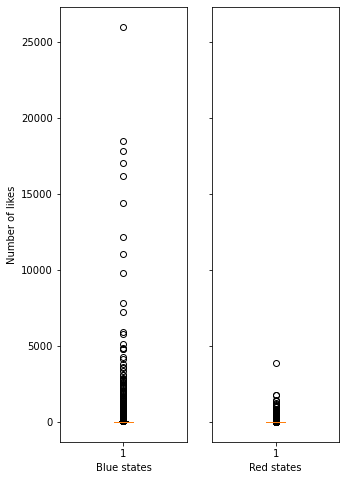

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,8), sharey=True)
ax1.boxplot(states_Trump_lost['likes'])
ax2.boxplot(states_Trump_won['likes'])

ax1.set_xlabel('Blue states')
ax2.set_xlabel('Red states')
ax1.set_ylabel('Number of likes')

plt.show();

Looking at the two boxplots, it appears that tweets with #Trump received more likes in states that Trump lost.

### 4. On average, do tweets with #Trump from big accounts receive more retweets in states that Trump won compared to states that he lost?

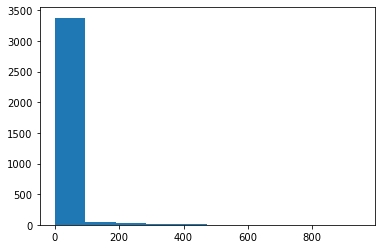

In [ ]:
# Check whether the data for 'retweet_count' is normally distributed
plt.hist(states_Trump_won['retweet_count']);

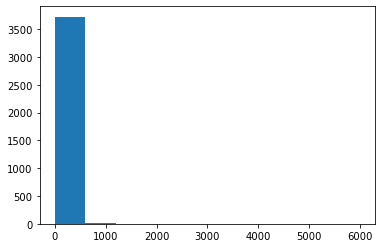

In [ ]:
plt.hist(states_Trump_lost['retweet_count']);

In [ ]:
print(stats.describe(states_Trump_won['retweet_count']))
print(stats.describe(states_Trump_lost['retweet_count']))

DescribeResult(nobs=3485, minmax=(0.0, 946.0), mean=11.381922525107605, variance=2774.1775720778073, skewness=9.015792519566833, kurtosis=104.80972969845403)
DescribeResult(nobs=3755, minmax=(0.0, 5986.0), mean=29.50652463382157, variance=44832.15465906939, skewness=18.682448937577256, kurtosis=423.098853396418)


In [ ]:
print(stats.shapiro(states_Trump_won['retweet_count']))
print(stats.shapiro(states_Trump_lost['retweet_count']))

ShapiroResult(statistic=0.21005016565322876, pvalue=0.0)
ShapiroResult(statistic=0.10389184951782227, pvalue=0.0)


The data was not normally distributed, so their medians will be compared.

In [ ]:
states_Trump_won['retweet_count'].median() - states_Trump_lost['retweet_count'].median()

-1.0

Becuase the data was not normally distributed, the Kruskal-Wallis test will be used to check the signficance of the difference in medians.

In [ ]:
stats.kruskal(states_Trump_won['retweet_count'], states_Trump_lost['retweet_count'])

KruskalResult(statistic=185.45579392945845, pvalue=3.1210079787399454e-42)

Based on the p-value, there appears to be a significant difference, which means we can reject the null hypothesis.

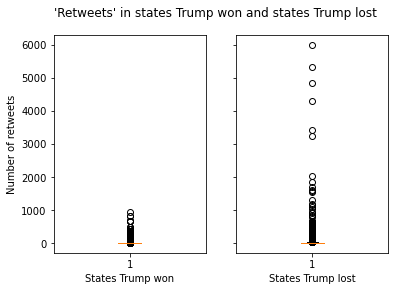

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("'Retweets' in states Trump won and states Trump lost")
ax1.boxplot(states_Trump_won['retweet_count'])
ax2.boxplot(states_Trump_lost['retweet_count'])

ax1.set_xlabel('States Trump won')
ax2.set_xlabel('States Trump lost')
ax1.set_ylabel('Number of retweets');

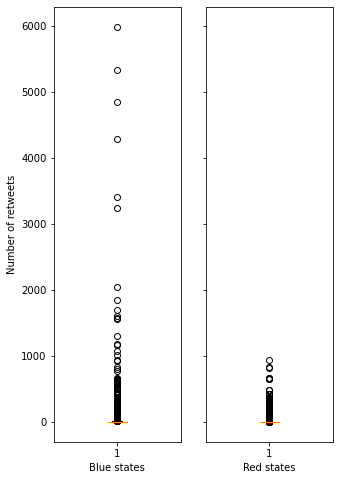

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,8), sharey=True)
ax1.boxplot(states_Trump_lost['retweet_count'])
ax2.boxplot(states_Trump_won['retweet_count'])

ax1.set_xlabel('Blue states')
ax2.set_xlabel('Red states')
ax1.set_ylabel('Number of retweets')

plt.show();

Looking at the two boxpots, it appears that tweets with #Trump received more retweets in states that Trump lost.